Episode 50, Total Reward: 18.0
Episode 100, Total Reward: 29.0
Episode 150, Total Reward: 15.0
Episode 200, Total Reward: 19.0
Episode 250, Total Reward: 19.0
Episode 300, Total Reward: 13.0
Episode 350, Total Reward: 59.0
Episode 400, Total Reward: 80.0
Episode 450, Total Reward: 81.0
Episode 500, Total Reward: 102.0


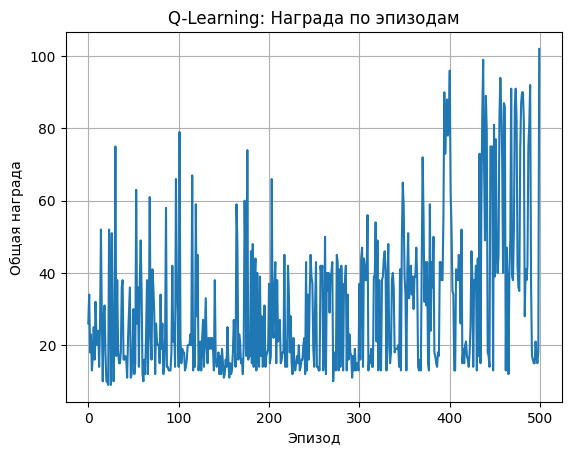

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

env = gym.make("CartPole-v1", render_mode="rgb_array")

def create_bins(num_bins=10):
    cart_pos = np.linspace(-2.4, 2.4, num_bins)
    cart_vel = np.linspace(-3.0, 3.0, num_bins)     
    pole_angle = np.linspace(-0.209, 0.209, num_bins)  
    pole_vel = np.linspace(-3.5, 3.5, num_bins)    
    return [cart_pos, cart_vel, pole_angle, pole_vel]

def discretize_state(state, bins):
    s = []
    for i in range(len(state)):
        value = state[i]
        bin_index = np.digitize(value, bins[i]) - 1
        bin_index = max(0, min(bin_index, len(bins[i]) - 1))
        s.append(bin_index)
    return tuple(s)

num_bins = 6  # Меньше бинов — проще для Q-learning
bins = create_bins(num_bins)
q_table_shape = tuple([num_bins] * 4 + [env.action_space.n])
q_table = np.zeros(q_table_shape)

# Гиперпараметры
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 500
max_steps = 500

rewards_per_episode = []

for ep in range(episodes):
    state = env.reset()[0]
    discrete_state = discretize_state(state, bins)
    done = False
    total_reward = 0

    for step in range(max_steps):
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[discrete_state])

        next_state, reward, done, _, _ = env.step(action)
        next_discrete_state = discretize_state(next_state, bins)

        q_table[discrete_state][action] += alpha * (
            reward + gamma * np.max(q_table[next_discrete_state]) - q_table[discrete_state][action]
        )

        discrete_state = next_discrete_state
        total_reward += reward

        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards_per_episode.append(total_reward)

    if (ep+1) % 50 == 0:
        print(f"Episode {ep+1}, Total Reward: {total_reward}")

env.close()

plt.plot(rewards_per_episode)
plt.title("Q-Learning: Награда по эпизодам")
plt.xlabel("Эпизод")
plt.ylabel("Общая награда")
plt.grid()
plt.show()

- К концу обучения (эпизод 500) агент достиг награды 102 , что намного выше начальных значений.
- Это говорит о том, что обучение происходило , и агент начал понимать, как сохранять шест вертикальным дольше.
- Визуализация подтверждает это

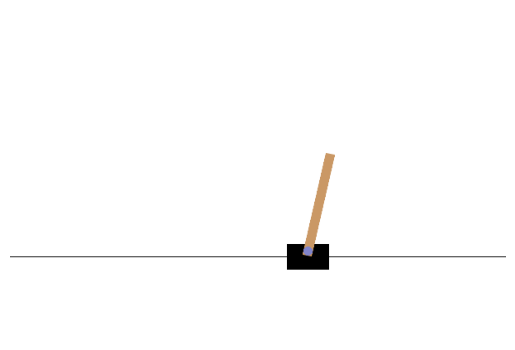

In [ ]:
# Визуализация

from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make("CartPole-v1", render_mode="rgb_array")
state = env.reset()[0]
done = False

while not done:
    discrete_state = discretize_state(state, bins)
    action = np.argmax(q_table[discrete_state])
    state, reward, done, _, _ = env.step(action)

    frame = env.render()
    clear_output(wait=True)
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

env.close()